### Writting Good Code
- Comment your code
- Name things properly
- do not repeate yourself
- KISS - keep it simple stupid
- type hinting
- use library functions as much as possible
- Think about performance
- Lower dependencies
- Use AI generated code but with care
- Do not write raw loops

# PyTorch

- Documentation
- Torch.tensor
    - Operations on tensors
    - Matrix Multiplication 
    - Device agonistic code

In [1]:
 #* Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch

# Creating tensors

`torch.tensor` creates the tensor    
`TENSOR.item` returns the python type data from the`torch.tensor`


In [2]:
scalar = torch.tensor(7)

vector = torch.tensor([89,69])

MATRIX = torch.tensor(
    [[12, 21, 12],
    [12, 12, 12]]
)

TENSOR = torch.tensor(
    [[[12, 21, 12],
    [12, 12, 12],
    [23, 4, 334]]]
)

In [3]:
scalar.ndim, vector.ndim, MATRIX.ndim, TENSOR.ndim

(0, 1, 2, 3)

SIZE of a tensor - the size of a tensor is such that first number will give us the number of blocks, and following numbers will give us number of sub-blocks and so on, last two numbers will give us the dimension of matrices and 3rd last number will give us the number of matrices in the last sub-block.

In [4]:
scalar.shape, vector.shape, MATRIX.shape, TENSOR.shape

(torch.Size([]), torch.Size([2]), torch.Size([2, 3]), torch.Size([1, 3, 3]))

Also interestingly there are two functions,   
`torch.tensor` which will infer the dtype as is    
`torch.Tensor` which is basically `torch.FloatTensor` 

this is a rabbit of some sort, Tensor is faster then tensor, also I have found out that `torch.Tensor` generates a tensor with that number of random elements.
so, `torch.Tensor(7)` will generate a vector with 7 random numbers.

In [5]:
torch.tensor(7), torch.Tensor(7)

(tensor(7),
 tensor([1.0840e-08, 1.0623e-05, 1.0374e-08, 1.2681e+16, 2.1707e-18, 7.0952e+22,
         1.7748e+28]))

## Random tensors
Creating random tensors is useful in NNets because we can generate a initial weights and biases randomly. and start from there.

In [6]:
random_tensor = torch.rand(3, 3)
random_tensor

tensor([[0.6107, 0.8425, 0.5813],
        [0.8946, 0.6103, 0.1251],
        [0.5364, 0.6935, 0.8680]])

Color image tensors are generally of tensor dim = 3, 3 dimensional tensors, each dimensions representing the activation of different color channels.

In [7]:
random_image_tensor = torch.rand( size = (224, 224, 3))
random_image_tensor.shape, random_image_tensor.ndim

(torch.Size([224, 224, 3]), 3)

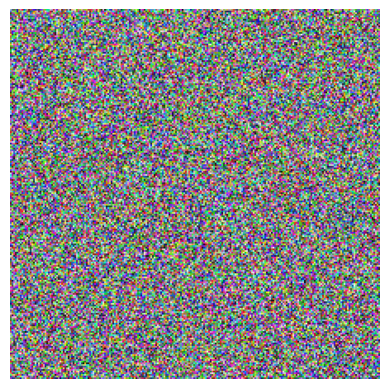

In [8]:
fig, ax = plt.subplots()
ax.imshow(random_image_tensor)
ax.axis('off')  # Hides axes
plt.show()

## Zeros and Ones
zeros and ones tensors for masking and manipulating the tensor via multiplication of summation.

In [9]:
zeros = torch.zeros(3, 3) #? 3x3 matrix of zeros
ones = torch.ones(3, 3) #? 3x3 matrix of ones

## Range Tensors and Tansor-like

In [10]:
step_tensor = torch.arange(start = 0, end = 10, step = 2) #? 0 to 10 with step 2
step_tensor

tensor([0, 2, 4, 6, 8])

create a zeros tensor but with the shape of a input tensor

In [11]:
step_tensor_like = torch.zeros_like(input=step_tensor) 
step_tensor_like

tensor([0, 0, 0, 0, 0])

# Tensor Data Types
https://pytorch.org/docs/stable/tensors.html


In [12]:
# Default datatype for tensors is float32
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, #* defaults to None, which is torch.float32 or whatever datatype is passed
                               device=None, #* defaults to None, which uses the default tensor type
                               requires_grad=False) #* if True, operations performed on the tensor are recorded 

float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device

(torch.Size([3]), torch.float32, device(type='cpu'))

You can get the information about the tensor by `TENSOR.shpae, TENSOR.dtype, TENSOR.device`

Converting the dtype of the tensor

In [13]:
float_16_tensor = float_32_tensor.type(torch.float16) # torch.half would also work
float_16_tensor.dtype

torch.float16

# Tensor operations
All the basic operations works as you expect the only thing you need to be careful is with some linear algebra operations like dot product, hadamard product and so on

## Matrix Multiplication

Dot product in linear algebra, no. of rows of the first tensor should match no. column of second tensor.

In [14]:
tensor = torch.tensor([1, 2, 3])

Converting torch.dtype to python data type

In [35]:
for _ in tensor: print(f"{_.item()} with type: {type(_.item())}")

1 with type: <class 'int'>
2 with type: <class 'int'>
3 with type: <class 'int'>


In [15]:
%%time
# Matrix multiplication by hand 
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: user 689 μs, sys: 26 μs, total: 715 μs
Wall time: 635 μs


tensor(14)

In [16]:
%%time
torch.matmul(tensor, tensor)

CPU times: user 362 μs, sys: 0 ns, total: 362 μs
Wall time: 255 μs


tensor(14)

`torch.matmul` is faster than the for-loop. this is a general guidline in all the library function everywhere. **-DO NOT USE RAW LOOPS-**

### Transpose function

Can be useful when multiplying the same rectangular tensor.    
- `torch.transpose (TENSOR, dim0, dim1)` is a way to transpose in a dimension for 2d the obvious transpose is between 0th dim and 1st dim. In 3d or 4d tensor it will transpose the appropriate dims, for example change 3rd with 4th in 5dim tensor.    
- `Tensor.T` is a simplified transpose. always transpose last two dimensions

In [17]:
tensor = torch.rand(3, 1, 2)
tensor1 = torch.transpose(tensor, 1, 2)
tensor, tensor1, tensor.mT

(tensor([[[0.6971, 0.5860]],
 
         [[0.4687, 0.0291]],
 
         [[0.4239, 0.8363]]]),
 tensor([[[0.6971],
          [0.5860]],
 
         [[0.4687],
          [0.0291]],
 
         [[0.4239],
          [0.8363]]]),
 tensor([[[0.6971],
          [0.5860]],
 
         [[0.4687],
          [0.0291]],
 
         [[0.4239],
          [0.8363]]]))

### min, max, mean, sum

mean function only work on float type objects

In [18]:
x = torch.arange(start = 0, end = 11, step = 2).type(torch.float32)
x , x.dtype

(tensor([ 0.,  2.,  4.,  6.,  8., 10.]), torch.float32)

In [19]:
torch.min(x), torch.max(x), torch.mean(x), torch.sum(x)

(tensor(0.), tensor(10.), tensor(5.), tensor(30.))

In [20]:
torch.argmax(x), torch.argmin(x)

(tensor(5), tensor(0))

### Reshaping, stacking, squeezing, unsqueezing tensors

Often times you'll want to reshape or change the dimensions of your tensors without actually changing the values inside them.

To do so, some popular methods are:

| Method | One-line description |
| ----- | ----- |
| [`torch.reshape(input, shape)`](https://pytorch.org/docs/stable/generated/torch.reshape.html#torch.reshape) | Reshapes `input` to `shape` (if compatible), can also use `torch.Tensor.reshape()`. |
| [`Tensor.view(shape)`](https://pytorch.org/docs/stable/generated/torch.Tensor.view.html) | Returns a view of the original tensor in a different `shape` but shares the same data as the original tensor. |
| [`torch.stack(tensors, dim=0)`](https://pytorch.org/docs/1.9.1/generated/torch.stack.html) | Concatenates a sequence of `tensors` along a new dimension (`dim`), all `tensors` must be same size. |
| [`torch.squeeze(input)`](https://pytorch.org/docs/stable/generated/torch.squeeze.html) | Squeezes `input` to remove all the dimenions with value `1`. |
| [`torch.unsqueeze(input, dim)`](https://pytorch.org/docs/1.9.1/generated/torch.unsqueeze.html) | Returns `input` with a dimension value of `1` added at `dim`. | 
| [`torch.permute(input, dims)`](https://pytorch.org/docs/stable/generated/torch.permute.html) | Returns a *view* of the original `input` with its dimensions permuted (rearranged) to `dims`. | 


In [21]:
x = torch.arange(start = 0, end = 11, step = 2).type(torch.float32)
x, x.shape

(tensor([ 0.,  2.,  4.,  6.,  8., 10.]), torch.Size([6]))

reshape will add or remove the dimensions if compatible, that is total number of the elements must match

In [22]:
x_reshape = x.reshape (2, 3)
x_reshape

tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])

view will have the same memory address. so changing the view will change the original tensor, but they are not the same tensors. The dimension of the tensors can be different.

In [23]:
z = x.view(2, 3)
z[:, 0] = 5
z , x

(tensor([[ 5.,  2.,  4.],
         [ 5.,  8., 10.]]),
 tensor([ 5.,  2.,  4.,  5.,  8., 10.]))

In [24]:
x = torch.zeros(2, 3, 1, 4)
y = torch.squeeze(x).shape #* removes all dimensions of size 1
z = torch.unsqueeze(x, dim=0).shape #* adds a dimension at the specified index
x.shape,y,z

(torch.Size([2, 3, 1, 4]), torch.Size([2, 3, 4]), torch.Size([1, 2, 3, 1, 4]))

### Numpy with pytorch

In [25]:
# Convert PyTorch tensor to NumPy array
tensor = torch.tensor([1, 2, 3])
numpy_array = tensor.numpy()

# Convert NumPy array back to PyTorch tensor
tensor_back = torch.from_numpy(numpy_array)

print("PyTorch tensor:", tensor)
print("NumPy array:", numpy_array)
print("PyTorch tensor (converted back from NumPy array):", tensor_back)

PyTorch tensor: tensor([1, 2, 3])
NumPy array: [1 2 3]
PyTorch tensor (converted back from NumPy array): tensor([1, 2, 3])


### Device agonistic code with pytorch

In [26]:
import torch

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define tensors
tensor1 = torch.tensor([1, 2, 3]).to(device)
tensor2 = torch.tensor([4, 5, 6]).to(device)

# Perform operations on tensors
result = tensor1 + tensor2

# Move result back to CPU if necessary
result = result.cpu()

# Print the result
print(result)

tensor([5, 7, 9])


# References

1. **PyTorch Documentation** - https://docs.pytorch.org/docs/stable/torch.html#
    - Look up 
        - torch.nn 
        - torch.nn.functional
        - torch.nn.modules